<a href="https://colab.research.google.com/github/VascoBartolo/SP_project/blob/niki/niki_sp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)

Mounted at /content/drive


In [ ]:
import scipy
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import wavfile
import scipy.io
import os
import scipy.signal
!pip install noisereduce
import noisereduce as nr
import scipy.fft as fft
import librosa.feature
import librosa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from IPython.display import Audio

In [ ]:
fem = "/content/drive/MyDrive/signal_processing/females/"
mal = "/content/drive/MyDrive/signal_processing/males/"


fems = np.array([fem+x for x in os.listdir(fem)])
mals = np.array([mal+x for x in os.listdir(mal)])

In [ ]:
faudios = np.array([wavfile.read(wav_fname)for wav_fname in fems]) # samplerate, data
maudios = np.array([wavfile.read(wav_fname)for wav_fname in mals])

<ipython-input-7-95ac0828546e>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  faudios = np.array([wavfile.read(wav_fname)for wav_fname in fems]) # samplerate, data
<ipython-input-7-95ac0828546e>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  maudios = np.array([wavfile.read(wav_fname)for wav_fname in mals])


In [ ]:
sr, audio = faudios[3][0], faudios[3][1]

In [ ]:
display( Audio(audio, rate = sr, autoplay = True))

In [ ]:
sr, caudio = faudios[3][0], nr.reduce_noise(faudios[3][1], sr = faudios[3][0])

In [ ]:
display( Audio(caudio, rate = sr, autoplay = True))

In [ ]:

scipy.stats.describe(audio)

DescribeResult(nobs=75776, minmax=(-6605, 6709), mean=0.044697529560810814, variance=997022.9589126951, skewness=0.2795465776612099, kurtosis=2.2516928995742385)

In [ ]:
scipy.stats.describe(caudio)

DescribeResult(nobs=75776, minmax=(-6499, 6463), mean=0.05314347550675676, variance=166564.63737368825, skewness=0.12184396992010565, kurtosis=41.35169430789925)

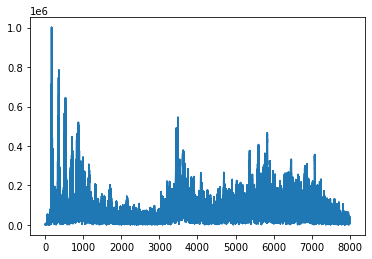

In [ ]:
N = len(caudio)

yf = fft.fft(caudio)
xf = fft.fftfreq(N, 1 / sr)

plt.plot(abs(xf), np.abs(yf))
plt.show()

In [ ]:
scipy.stats.describe(abs(yf))

DescribeResult(nobs=75776, minmax=(142.8338890356799, 1001525.7137708412), mean=87146.43501780802, variance=5027000814.963768, skewness=2.0159360263379824, kurtosis=7.6623582359098545)

In [ ]:
scipy.stats.describe(abs(xf))

DescribeResult(nobs=75776, minmax=(0.0, 8000.0), mean=3999.999999999999, variance=5333403.72457578, skewness=1.2723419579312643e-15, kurtosis=-1.1999999966562185)

In [ ]:
(f, S) = scipy.signal.periodogram(caudio, sr, scaling='density')


In [ ]:
len(S)

37889

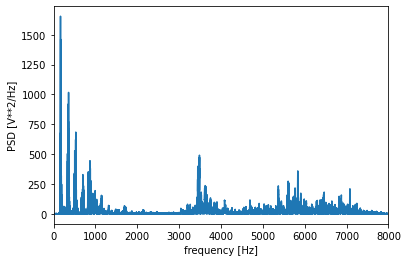

In [ ]:

import matplotlib.pyplot as plt

plt.plot(f, S)
#plt.ylim([1e-7, 1e4])
plt.xlim([0,max(f)])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

In [ ]:
peaks = scipy.signal.find_peaks(S)[0]

13611

In [ ]:
b = np.zeros_like(yf)
b[peaks] = yf[peaks]

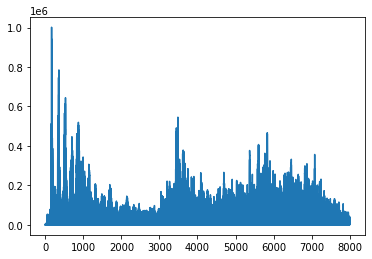

In [ ]:

#plt.ylim([0, 1e4])
plt.plot(abs(xf), np.abs(b))
plt.show()

In [ ]:
rf = fft.ifft(b)

In [ ]:
display( Audio(rf, rate = sr, autoplay = True))

/usr/local/lib/python3.8/dist-packages/IPython/lib/display.py:158: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


In [ ]:
filtered

array([-1164.43576519,  -436.27778063,   179.58953757, ...,
        -189.2624099 ,  -159.00236594,  -151.03875532])

In [ ]:
import scipy.fftpack as fft

In [ ]:
fourierf = fft.rfft(faudios[0][1])
cut_f_signal = fourierf.copy()
cut_f_signal[(16000<6)] = 0

cut_signal = fft.irfft(cut_f_signal)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1374: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


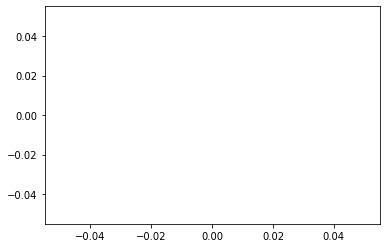

In [ ]:
sns.lineplot(cut_signal[0::10])

<ipython-input-50-27b21c8d2461>:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(fourierf)


<StemContainer object of 3 artists>

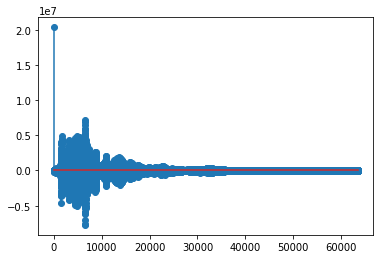

In [ ]:
plt.stem(fourierf)

In [ ]:
amp = np.abs(fourierf)
pow = amp**2
ang = np.angle(fourierf)
sfreq = 16000

amp_freq = np.array([amp, sfreq])
amp_pos = np.argmax(amp_freq[0])
peak_freq = amp_freq[0][amp_pos]

high_freq_fft = fourierf.copy()
high_freq_fft[np.abs(sfreq) > peak_freq] = 0
filtered_sig = fft.ifft(high_freq_fft)

<ipython-input-40-c956b695ca0b>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  amp_freq = np.array([amp, sfreq])


TypeError: ignored

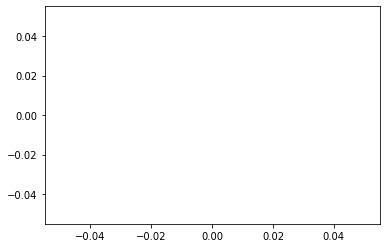

In [ ]:
sns.lineplot(data = filtered_sig[0::10])

In [ ]:
filtered_sig

array([-1.57400000e+03+0.00000000e+00j, -1.53800000e+03+3.30058561e-13j,
       -1.34500000e+03-3.48395148e-14j, ...,
       -6.74786392e-13+7.60522127e-14j,  1.40000000e+01-6.17702134e-13j,
        7.00000000e+00+1.92408191e-14j])

In [ ]:
dnum = len(filtered_sig)
real_absolute_fft = 2.0/dnum * \
                    np.abs(filtered_sig[:dnum//2])

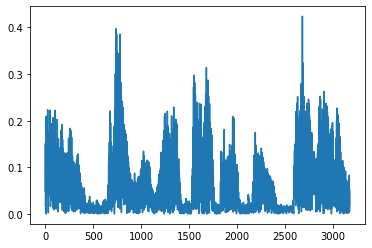

In [ ]:
sns.lineplot(data = real_absolute_fft[0::10])

<ipython-input-8-42d90c1eb61f>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(abs(fourierf))


<StemContainer object of 3 artists>

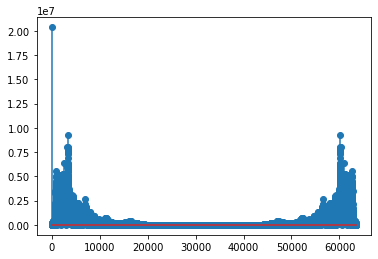

In [ ]:
#fig, ax = plt.subplots(1,2)

plt.stem(abs(fourierf))
#ax[1].stem(abs(fourierm))

In [ ]:
def normalize_audio(audio):
    audio = audio / np.max(np.abs(audio))
    return audio

In [ ]:
def frame_audio(audio, FFT_size=1028, hop_size=10, sample_rate=16000):
    # hop_size in ms
    
    audio = np.pad(audio, int(FFT_size / 2), mode='reflect')
    frame_len = np.round(sample_rate * hop_size / 1000).astype(int)
    frame_num = int((len(audio) - FFT_size) / frame_len) + 1
    frames = np.zeros((frame_num,FFT_size))
    
    for n in range(frame_num):
        frames[n] = audio[n*frame_len:n*frame_len+FFT_size]
    
    return frames

In [ ]:
audio = normalize_audio(faudios[0][1])
hop_size = 15 #ms
FFT_size = 1028
sample_rate = faudios[0][0]

audio_framed = frame_audio(audio, FFT_size=FFT_size, hop_size=hop_size, sample_rate=sample_rate)
print("Framed audio shape: {0}".format(audio_framed.shape))

Framed audio shape: (265, 1028)


In [ ]:
audio_framed[1]

array([-0.15896545, -0.12491472, -0.02251442, ...,  0.30868945,
        0.36060287,  0.37133288])

In [ ]:
from scipy.signal import get_window
window = get_window("hann", FFT_size, fftbins=True)

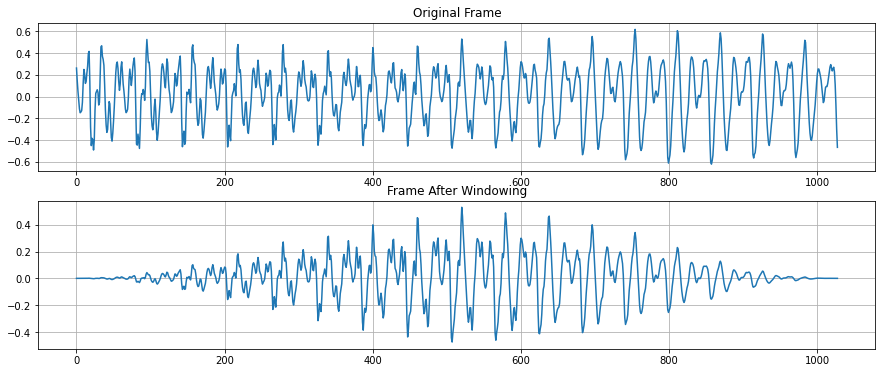

In [ ]:
audio_win = audio_framed * window

ind = 69
plt.figure(figsize=(15,6))
plt.subplot(2, 1, 1)
plt.plot(audio_framed[ind])
plt.title('Original Frame')
plt.grid(True)
plt.subplot(2, 1, 2)
plt.plot(audio_win[ind])
plt.title('Frame After Windowing')
plt.grid(True)

In [ ]:
import librosa.feature

In [ ]:
def extract_feature(file_name, **kwargs):
    mfcc = kwargs.get("mfcc")
    chroma = kwargs.get("chroma")
    mel = kwargs.get("mel")
    contrast = kwargs.get("contrast")
    tonnetz = kwargs.get("tonnetz")
    X, sample_rate = librosa.core.load(file_name)
    if chroma or contrast:
        stft = np.abs(librosa.stft(X))
    result = np.array([])
    if mfcc:
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
        result = np.hstack((result, mfccs))
    if chroma:
        chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
        result = np.hstack((result, chroma))
    if mel:
        mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
        result = np.hstack((result, mel))
    if contrast:
        contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
        result = np.hstack((result, contrast))
    if tonnetz:
        tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate).T,axis=0)
        result = np.hstack((result, tonnetz))
    return result

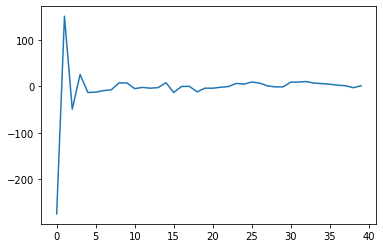

In [ ]:
plt.plot(extract_feature(fems[0], mfcc = True))

<ipython-input-94-9e65e2682b7d>:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(extract_feature(fems[0], chroma = True))


<StemContainer object of 3 artists>

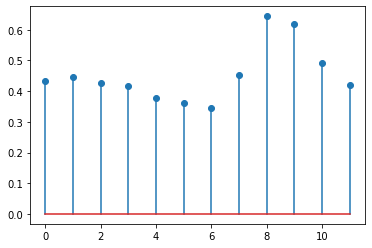

In [ ]:
plt.stem(extract_feature(fems[0], chroma = True))

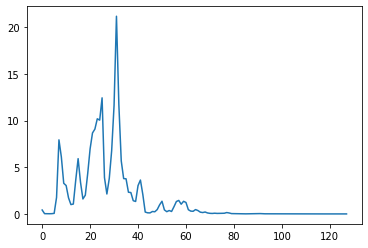

In [ ]:
plt.plot(extract_feature(fems[0], mel = True))

<ipython-input-96-b1ef042701a4>:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(extract_feature(fems[0], contrast = True))


<StemContainer object of 3 artists>

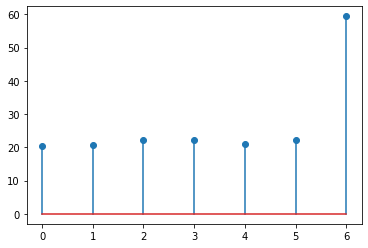

In [ ]:
plt.stem(extract_feature(fems[0], contrast = True))

<ipython-input-98-10cbaef0f8ae>:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(extract_feature(fems[0], tonnetz = True))


<StemContainer object of 3 artists>

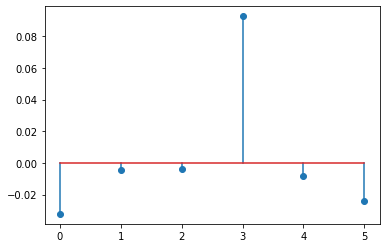

In [ ]:
plt.stem(extract_feature(fems[0], tonnetz = True))

In [ ]:
import librosa

In [ ]:
data, sampling_frequency = librosa.load(mals[0])
T = 1/sampling_frequency # Sampling period
N = len(data) # Signal length in samples
t = N / sampling_frequency # Signal length in seconds

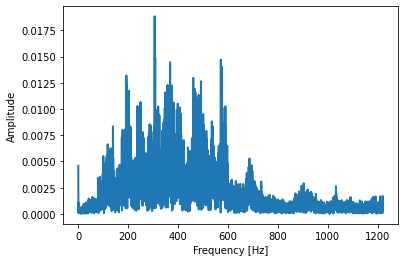

In [ ]:
Y_k = np.fft.fft(data)[0:int(N/2)]/N # FFT
Y_k[1:] = 2*Y_k[1:] # Single-sided spectrum
Pxx = np.abs(Y_k) # Power spectrum

f = sampling_frequency * np.arange((N/2)) / N; # frequencies

# plotting
fig,ax = plt.subplots()
plt.plot(f[0:5000], Pxx[0:5000], linewidth=2)
plt.ylabel('Amplitude')
plt.xlabel('Frequency [Hz]')
plt.show()

In [ ]:
import statsmodels.api as sm
from scipy.signal import find_peaks

In [ ]:
auto = sm.tsa.acf(data, nlags = 1000)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [ ]:
find_peaks(auto)

(array([ 48,  64,  81,  95, 125, 144, 190, 228, 274, 341, 354, 370, 422,
        451, 492, 537, 543, 565, 568, 612, 649, 652, 702, 705, 775, 789,
        803, 855, 874, 897, 937, 966, 993]), {})

In [ ]:
peaks = find_peaks(auto)[0] # Find peaks of the autocorrelation
lag = peaks[0] 

In [ ]:
pitch = sampling_frequency / lag # Transform lag into frequency

In [ ]:
pitch

459.375

In [ ]:
def pitchfinder(file_name):
    data, sampling_frequency = librosa.load(mals[0])
    T = 1/sampling_frequency # Sampling period
    N = len(data) # Signal length in samples
    t = N / sampling_frequency # Signal length in seconds
    Y_k = np.fft.fft(data)[0:int(N/2)]/N # FFT
    Y_k[1:] = 2*Y_k[1:] # Single-sided spectrum
    Pxx = np.abs(Y_k) # Power spectrum

    f = sampling_frequency * np.arange((N/2)) / N; # frequencies
    auto = sm.tsa.acf(data, nlags = )
    peaks = find_peaks(auto)[0] # Find peaks of the autocorrelation
    lag = peaks[0] 
    pitch = sampling_frequency / lag # Transform lag into frequency
    return pitch

In [ ]:
data, sampling_frequency = librosa.load(mals[0])

In [ ]:
sampling_frequency

22050

In [ ]:
male_pitches = []
for i  in mals:
  male_pitches.append(pitchfinder(i))

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [ ]:
scipy.stats.describe(male_pitches)

DescribeResult(nobs=51, minmax=(459.375, 459.375), mean=459.375, variance=0.0, skewness=0.0, kurtosis=-3.0)

In [ ]:
female_pitches = []
for i  in fems:
  female_pitches.append(pitchfinder(i))

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [ ]:
scipy.stats.describe(female_pitches)

DescribeResult(nobs=51, minmax=(459.375, 459.375), mean=459.375, variance=0.0, skewness=0.0, kurtosis=-3.0)

In [ ]:
data, sampling_frequency = librosa.load(mals[0])

In [ ]:
wn = Audio(data, rate = sampling_frequency, autoplay = True)

In [ ]:
display(wn)

In [ ]:
import scipy.fft as fft

In [ ]:

f_sig = fft.fft(data)

<ipython-input-157-b7c8b2cb3a5e>:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.abs(f_sig))


<StemContainer object of 3 artists>

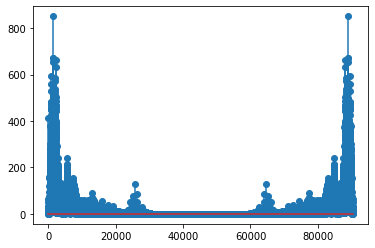

In [ ]:
plt.stem(np.abs(f_sig))

In [ ]:
absv = [i if i > 400 else 0  for i in np.abs(f_sig) ]

In [ ]:
arr = []
for i in f_sig:
  if (abs(i) > 10) and (abs(i) < 400) :
    arr.append(i)
  else:
    arr.append(0)

In [ ]:

finv = fft.ifft(arr)

In [ ]:
finv = np.real_if_close(finv)

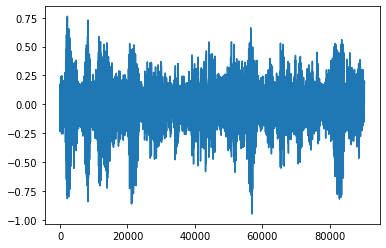

In [ ]:
sns.lineplot(data = finv)

In [ ]:
wn = Audio(finv, rate = sampling_frequency, autoplay = True)

In [ ]:
display(wn)

In [ ]:
import librosa.display

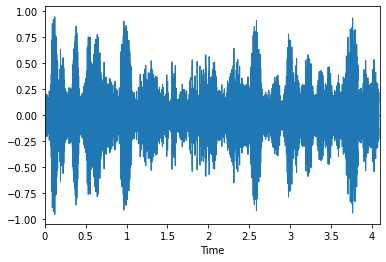

In [ ]:
librosa.display.waveplot(data,sr=sampling_frequency, x_axis='time');

In [ ]:
def f_high(y,sr):
    b = scipy.signal.butter(10, [50, 70], fs = sr ,btype='bandstop', output = 'sos')
    yf = scipy.signal.sosfilt(b,y)
    return yf

In [ ]:
yf1 = f_high(data, sampling_frequency)

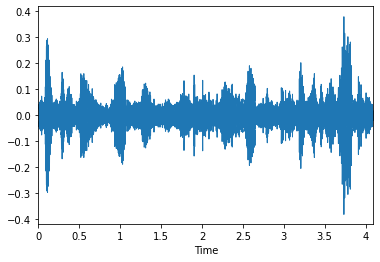

In [ ]:
librosa.display.waveplot(yf1,sr=sampling_frequency, x_axis='time')

In [ ]:
wn = Audio(data, rate = sampling_frequency, autoplay = True)

In [ ]:
display(wn)

In [ ]:
wn = Audio(yf1, rate = sampling_frequency, autoplay = True)

In [ ]:
display(wn)

In [ ]:
PSD0 = np.where(PSD<100, 0, PSD)

In [ ]:
np.mean(PSD)

(0.026719727802463795+0j)

In [ ]:
def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

In [ ]:
signaltonoise(data, axis = -1)

array(-0.02812612)